SVM 시각화

In [1]:
# make moon은 달모양의 데이터 분포를 생성해주는 함수입니다. 달모양 데이터가 어떻게 분류되는지 확인.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

In [2]:
X,y = make_moons(noise=0.1, random_state=2) #반달 두 개 엎어놓은 모양의 데이터 분포를 형성해주는 라이브러리
data = pd.DataFrame(data=X, columns=['x1','x2']) #x데이터는 2차원
data['y']=y #타겟변수 분리
data.head()

,x1,x2,y
0,1.327241,-0.222425,1
1,-0.429116,1.071136,0
2,0.014901,0.003679,1
3,0.000352,1.087226,0
4,0.676553,0.857039,0


In [3]:
#Support Vector Machine은 스케일링이 필수. 
#'거리'라는 요소를 사용하는 KNN SVM 등은 Scaling을 해주어야 한다. 

scaler = StandardScaler() #거리기반은 스케일링이 중요
Xstan = scaler.fit_transform(X)

#scailing 하는 이유 : 각각의 features들의 수치가 단위에 따라서 다른 크기를 가지기 때문입니다.

In [4]:
from sklearn.metrics.pairwise import rbf_kernel 

In [5]:
svc = SVC(kernel='linear', C= 100) #linear한 svm 적용. 에러페널티는 높게준다.
svc.fit(Xstan,y) #모델 트레이닝 하는 코드

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
#https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
#근데 2차원밖에 안되는 것 같읍니다. ㅠ 삼차원으로 바꿔보려고 항을 이것저것 바꿔보았는데 잘 안되더라구요
def draw_hyperplane(model, X, y):
    plt.scatter(X[:, 0], X[:, 1],c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=50,
            linewidth=1, facecolors='none', edgecolors='k')
    plt.xlabel('x1', fontsize = 18)
    plt.ylabel('x2', fontsize = 18)
    plt.show()

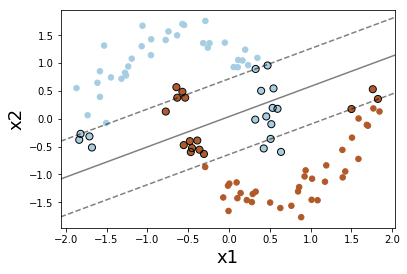

In [7]:
draw_hyperplane(svc,Xstan,y) #굵은 부분은 서포트벡터 + 에러난 벡터 

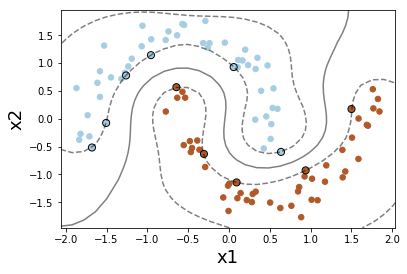

In [8]:
#case for gaussian kernel C = 100 : overfitting
svc_2 = SVC(kernel='rbf', gamma = 1, C = 100)
svc_2.fit(Xstan, y)
draw_hyperplane(svc_2, Xstan, y)

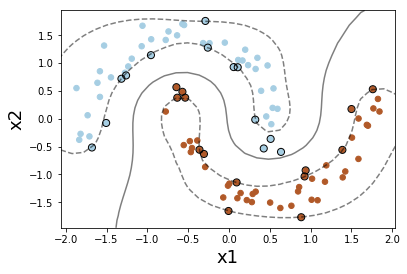

In [9]:
#case for gaussian kernel C = 1 : underfitting
svc_2=SVC(kernel='rbf', gamma = 1, C = 1)
svc_2.fit(Xstan, y)
draw_hyperplane(svc_2, Xstan, y)

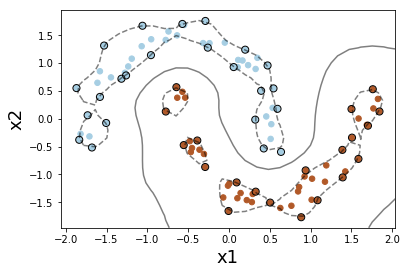

In [10]:
#case for gaussian kernel gamma = 5 : overfitting
svc_2=SVC(kernel='rbf', gamma = 5, C = 1) #감마를 올리면, 오버피팅이 되어서 가까운 애들아니면 같이 분류안함
svc_2.fit(Xstan,y)
draw_hyperplane(svc_2,Xstan,y)

구입을 했니? 안했니? 예측하자

In [11]:
SN_ad = pd.read_csv('SN_ad.csv')

In [12]:
SN_ad.describe() #SN_ad의 데이터 보기

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [13]:
SN_ad.isnull()  #결측치 확인, true면 결측

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [14]:
SN_ad.isnull().sum() #결측치 없음을 확인

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [15]:
#총 라벨 수 확인
print("Total number of labels: {}".format(SN_ad.shape[0]))
print("Number of male: {}".format(SN_ad[SN_ad.Purchased == 0].shape[0]))
print("Number of female: {}".format(SN_ad[SN_ad.Purchased == 1].shape[0]))

Total number of labels: 400
Number of male: 257
Number of female: 143


In [16]:
#User ID는 쓸모없는 정보라 지우자
SN_ad = SN_ad.drop('User ID',axis = 1) #컬럼 삭제

In [17]:
SN_ad.head()

#지워짐을 확인

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [18]:
#여자(Female), 남자(male)을 숫자로 바꾸자
def transform_to_integer(x):
    if x=='Male':
        return 0
    elif x=='Female':
        return 1

In [19]:
SN_ad['Gender'] = SN_ad['Gender'].apply(transform_to_integer) #함수를 적용하여 SN_ad['Gender'] 컬럼에 적용

In [20]:
X = SN_ad.iloc[:,:-1] # X데이터 분리
y = SN_ad.iloc[:,-1] # y데이터 분리

In [21]:
print(y)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      1
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     0
29     0
      ..
370    1
371    1
372    0
373    1
374    0
375    1
376    0
377    0
378    1
379    1
380    0
381    1
382    1
383    1
384    1
385    1
386    1
387    0
388    1
389    1
390    1
391    1
392    1
393    1
394    0
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
#데이터 셋 분리 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

In [24]:
from sklearn import metrics #model evaluation하는 라이브러리

svc=SVC(kernel='linear') # 리니어 모델로해보자
svc.fit(X_train,y_train) # 모델 훈련 중...

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
y_pred=svc.predict(X_test) # 훈련한 모델로 test셋을 시험해보자
print('Accuracy Score:') 
print(metrics.accuracy_score(y_test,y_pred)) #스코어 확인

Accuracy Score:
0.825


In [30]:
svc_2=SVC(kernel='rbf', gamma=1) # rbf 커널 모델로해보자
svc_2.fit(X_train,y_train) # 모델 훈련 중...

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
y_pred=svc_2.predict(X_test)
print('rbf Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

rbf Accuracy Score:
0.875
